- commulative distribution of which pixels are in which icc
- threshold now 100% -> for pixel to be added at a sample size, we need it to stay in that icc until the end
    - show different threshold curves


- maybe do pixel in most probable group

- 1st try
- do in relation to a random final partitioning
- for a pixel, compute the fraction of "correct" group members
- for a sample compute the average fraction of "correct" group members for each icc


1. Get "correct" parition map
2. Get a sample size, compute for each of the 10 runs, the fraction of "correct" members in the group for each icc
3. comput mean those 10 runs
4. do for all sample sizes

5. exchange "correct" random partition with actual best one

#### NOTE: what about different MCM for different digits? Have only looked at some arbitrary example digits like 0 now?

In [1]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
from src.loaders import load_data, load_labels
from src.classify import MCM_Classifier
import os
import src.plot as myplot
import os
import json

import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore', 'use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.')


In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)



<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/classifier/bin/../src/plot.py'>

In [3]:
samples_path = f"../OUTPUT/sample_sizes/"
fname = "MCMs_"

In [4]:
# 1. Get "correct " partition map (some random paritioning from 5423 for now)
sample_size = 5423
digit = 0

correct_partition = []
mcms_path = os.path.join(samples_path, str(sample_size), "MCMs")
i = 0 # for loop here
with open(os.path.join(mcms_path, fname+str(i)+ ".json")) as f:
        # samples[sample_size] = json.load(f)
        correct_partition.append(json.load(f))

correct_partition = correct_partition[i][digit]
correct_coo = myplot.create_cooccurance_matrix(correct_partition)

In [9]:
# 2. For a sample size, compute the fraction of correct members in the group of each icc
# that is get the partition map and check fraction overlap between rows in where the 1s are excluding diagonal

mcm_sample = []
sample_size = 10 # for loop here
mcms_path = os.path.join(samples_path, str(sample_size), "MCMs")
for i in range(len(os.listdir(mcms_path))):
    with open(os.path.join(mcms_path, fname+str(i)+ ".json")) as f:
            # samples[sample_size] = json.load(f)
            mcm_sample.append(json.load(f))

mcm_0_multisample = [myplot.create_cooccurance_matrix(mcm_sample[i][digit]) for i in range(10)]


In [10]:
corr = correct_coo
np.fill_diagonal(corr,0)

convergence = []
for i, mcm_s in enumerate(mcm_0_multisample):
    a = mcm_s+corr
    np.fill_diagonal(a, 0)
    convergence.append(np.where(np.all(a != 2, axis=0))[0])

In [11]:
# fraction between runs this pixel is not grouped the same as in the end (inverse)
# fraction of wrong pixels for that sample size over runs
fraction_incorrectly_grouped = np.zeros((121))
for conv in convergence:
    fraction_incorrectly_grouped[conv] += 1
fraction_incorrectly_grouped = fraction_incorrectly_grouped/len(convergence)
fraction_incorrectly_grouped


array([1. , 1. , 1. , 0.9, 0.9, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       0.8, 0.5, 0.2, 0.1, 0.6, 0.6, 0.8, 0. , 1. , 1. , 1. , 0.4, 0. ,
       0.8, 1. , 0.9, 0.9, 0.4, 0.2, 1. , 1. , 1. , 0.7, 0.7, 0.4, 0.2,
       0.5, 1. , 0.8, 0.3, 0.6, 1. , 0.4, 0.5, 0.5, 0.3, 0.5, 1. , 0.3,
       0.6, 0.8, 0.3, 1. , 0.4, 0.8, 0.5, 0.8, 0.7, 0.7, 0.3, 0.3, 0.3,
       0.1, 1. , 0.1, 0.7, 0.7, 1. , 1. , 1. , 0.4, 0. , 0.8, 0.3, 1. ,
       0. , 0.5, 0.5, 0.3, 0.3, 0.4, 0.5, 0.5, 0.8, 1. , 1. , 0.8, 0.3,
       0.5, 1. , 0.9, 0.8, 0.7, 0.3, 0. , 1. , 1. , 0. , 0.5, 0.3, 0. ,
       0. , 0.6, 0.3, 0.1, 1. , 1. , 0. , 0. , 0. , 0.8, 0.9, 0. , 0. ,
       1. , 1. , 1. , 1. ])

Red are pixels that do not have any of the pixels in their group that they have in their final partitioning.


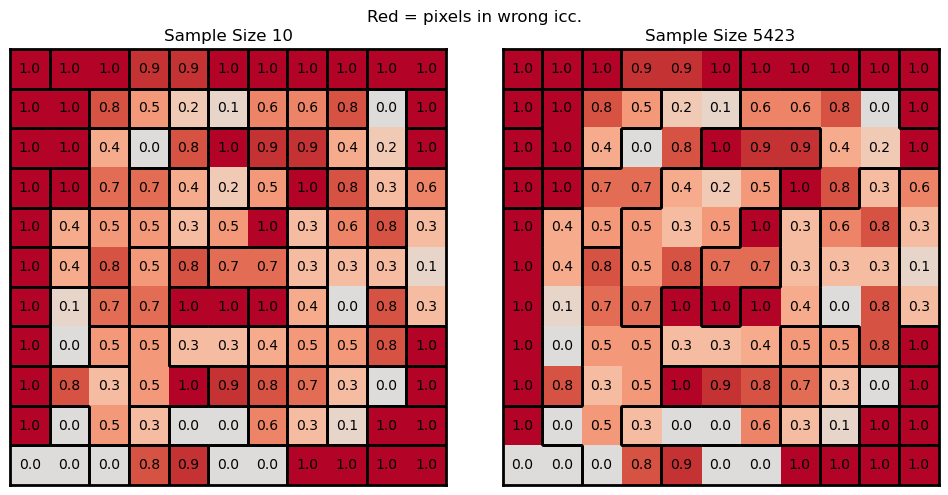

In [ ]:
size_smaller = 10 

wrong_pixels = convergence[0]
val = np.zeros(121)
val[wrong_pixels] = 1
val = val.reshape((11,11))
print("Red are pixels that do not have any of the pixels in their group that they have in their final partitioning.")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle("Red = pixels in wrong icc.")
comms_0 = mcm_sample[0][0]
comms_0 = myplot.generate_icc_comms_map(comms_0)
axs[0].set_title(f'Sample Size {size_smaller}')
im = myplot.partition_map(axs[0], fraction_incorrectly_grouped.reshape((11,11)),  fraction_incorrectly_grouped.reshape((11,11)), myplot.find_borders(comms_0), cbar=False)

comms_0 = correct_partition
comms_0 = myplot.generate_icc_comms_map(comms_0)
axs[1].set_title('Sample Size 5423')
im = myplot.partition_map(axs[1], fraction_incorrectly_grouped.reshape((11,11)),  fraction_incorrectly_grouped.reshape((11,11)), myplot.find_borders(comms_0), cbar=False)
plt.tight_layout()
plt.show()


the following only tests sample vs. end, not commulative
- for commulative, need to know which pixels are already correcly grouped in previous ones and exclude those
- so how about we instead of looking for correctly grouped pixels in previous ones, we check if there are any pixels in previous ones that have at least one partner correct alread
- then they are not 100% wrong and are excluded


for every sample, i add the 0 fraction pixels (that in the 10 runs were always not fully wrongly grouped) to an exclusion list
- need to check difference between 0 fraction pixels in previous sample and current sample
- Question will be: How many 0 probability pixels are new in this sample size? -> but also sus because some may disappear

In [ ]:
# 2. For a sample size, compute the fraction of correct members in the group of each icc
# that is get the partition map and check fraction overlap between rows in where the 1s are excluding diagonal
corr = correct_coo
np.fill_diagonal(corr,0)

sample_sizes = [10]+list(range(0,5424,100))[1:]
frac = np.zeros(len(sample_sizes))
frac_std = np.zeros(len(sample_sizes))
for s, sample_size in enumerate(sample_sizes):
    # load runs
    mcm_sample = []
    mcms_path = os.path.join(samples_path, str(sample_size), "MCMs")
    for i in range(len(os.listdir(mcms_path))):
        with open(os.path.join(mcms_path, fname+str(i)+ ".json")) as f:
                mcm_sample.append(json.load(f))
    mcm_0_multisample = [myplot.create_cooccurance_matrix(mcm_sample[i][digit]) for i in range(10)]


    # find pixels in wrong icc
    convergence = []
    for i, mcm_s in enumerate(mcm_0_multisample):
        a = mcm_s+corr
        np.fill_diagonal(a, 0)
        convergence.append(np.where(np.all(a != 2, axis=0))[0])
    # fraction between runs this pixel is not grouped the same as in the end (inverse)
    # fraction of wrong pixels for that sample size over runs
    fraction_incorrectly_grouped = np.zeros((121))
    for conv in convergence:
        fraction_incorrectly_grouped[conv] += 1
    fraction_incorrectly_grouped = fraction_incorrectly_grouped/len(convergence)
    frac[s] = fraction_incorrectly_grouped.mean()
    frac_std[s] = fraction_incorrectly_grouped.std()




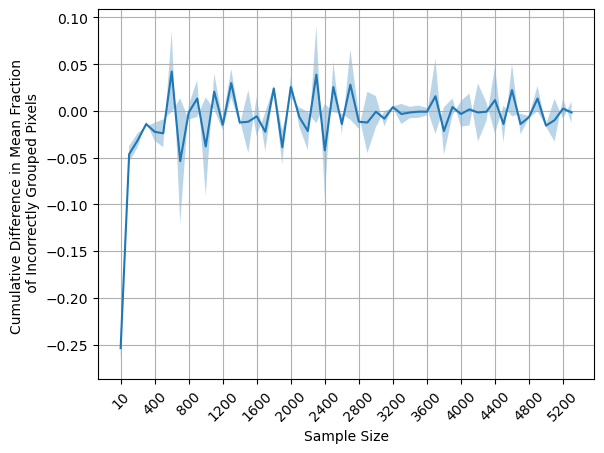

In [ ]:
cdf_cumulative = np.diff(frac) # cummulative difference 
cdf_std_cumulative = np.diff(frac_std)


plt.ylabel('Cumulative Difference in Mean Fraction \n of Incorrectly Grouped Pixels')

plt.plot(cdf_cumulative)
plt.fill_between(range(len(cdf_cumulative)), np.array(cdf_cumulative) - np.array(cdf_std_cumulative), np.array(cdf_cumulative) + np.array(cdf_std_cumulative), alpha=0.3)
plt.xlabel('Sample Size')
# plt.ylabel('Cumulative Mean Fraction of Incorrectly Grouped Pixels')
plt.xticks(np.arange(len(sample_sizes))[::4], sample_sizes[::4], rotation=45)
plt.grid(True)
plt.show()
